<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Множественное тестирование</b></h3>


## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Импорт данных

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, опираясь уже **НЕ** только на визуализацию. Само задание выполнить на языке **Python**.
   

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить (drop_duplicates). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (dropna())
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Сколько их?

In [3]:
# Удаляем пустые данные в столбце
data = data.dropna()
# заново проверяем
missing_data = data.isnull().sum()
missing_data

was_married    0
children       0
salary         0
sex            0
age            0
profession     0
home_cost      0
drive_info     0
happyness      0
dtype: int64

# Проверка гипотез

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">

<b>Задание:</b>    
    
Перед вами уже знакомый датасет, который был дан в прошлых домашних заданиях. Вы уже научились применить подходящий статистический критерий для двух групп, теперь вам предстоит научиться верно применять критерии для нескольких групп одновременно. 
    

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [4]:
# YOUR CODE
professions_of_interest = ["Homemaker", "Marketing", "Healthcare", "Executive"]
filtered_data = data[data["profession"].isin(professions_of_interest)]

from scipy.stats import shapiro

# Проверим нормальность зарплат для каждой профессии
for profession in professions_of_interest:
    salaries = filtered_data[filtered_data["profession"]== profession]["salary"]
    stat, p = shapiro(salaries)
    print(f"{profession}: p-value = {p}")

Homemaker: p-value = 0.2672271393472333
Marketing: p-value = 0.26788718988313615
Healthcare: p-value = 0.0054327752534342405
Executive: p-value = 0.06367801958141826


In [5]:
from scipy.stats import levene

stat, p = levene (
    filtered_data[filtered_data["profession"]== "Homemaker"]["salary"],
    filtered_data[filtered_data["profession"]== "Marketing"]["salary"],
    filtered_data[filtered_data["profession"]== "Healthcare"]["salary"],
    filtered_data[filtered_data["profession"]== "Executive"]["salary"]
)

print(f"Test Levene: p-value = {p}")

Test Levene: p-value = 8.714849723593766e-203


Text(0.5, 1.0, 'Comparison of Salaries by Profession')

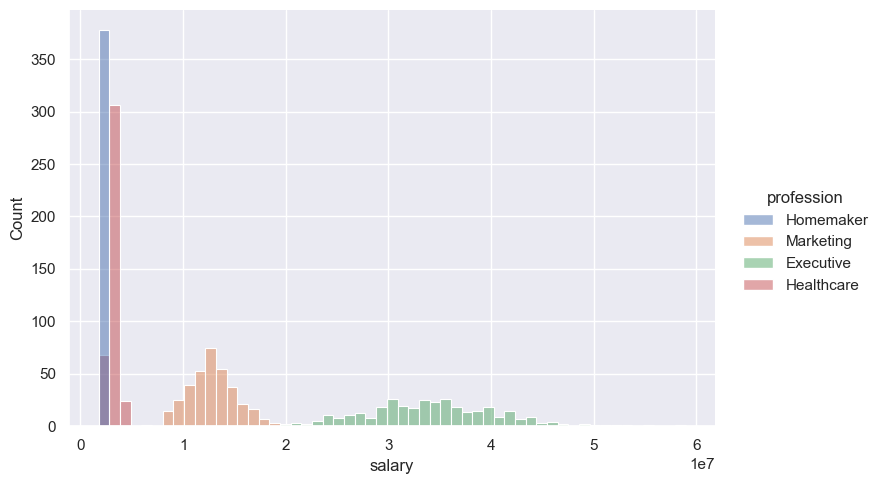

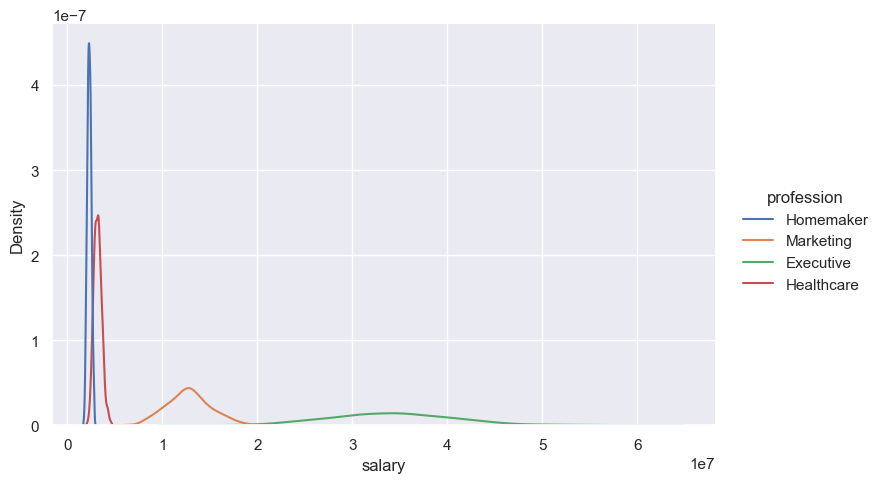

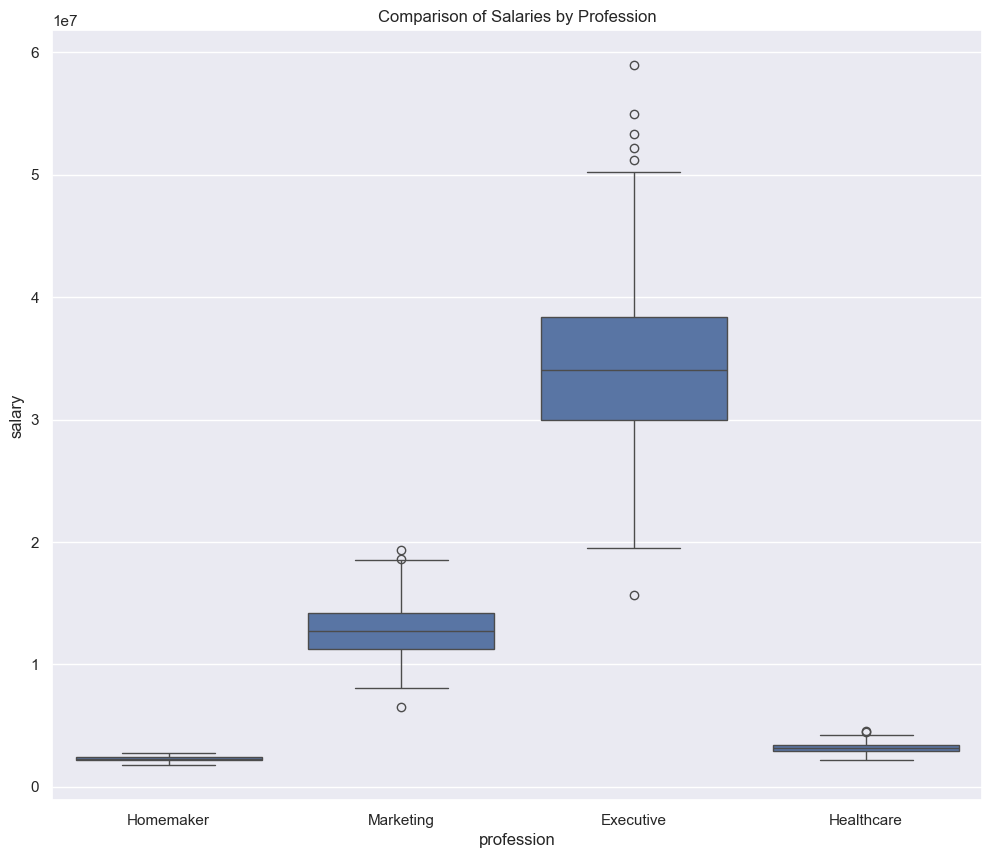

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение boxplot

sns.displot(filtered_data, x="salary", hue="profession", bins=55, height=5, aspect=1.5)
sns.displot(filtered_data, x="salary", hue="profession", height=5, aspect=1.5, kind='kde')

plt.figure(figsize=(12, 10))
sns.boxplot(x='profession', y='salary', data=filtered_data)
plt.title('Comparison of Salaries by Profession')

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [10]:
 # YOUR CODE
professions_of_interest_2 = ['Doctor', 'Entertainment', 'Lawyer']
filtered_data_2 = data[data['profession'].isin(professions_of_interest_2)]

In [11]:
for profession in professions_of_interest_2:
    salaries = filtered_data_2[filtered_data_2['profession']== profession]['salary']
    stat, p = shapiro(salaries)
    print(f'{profession}:: p-value = {p}')

Doctor:: p-value = 0.0010772013601611978
Entertainment:: p-value = 0.02270613220297246
Lawyer:: p-value = 0.18006817107753464


In [12]:
stat, p = levene(
    filtered_data_2[filtered_data_2['profession']== 'Doctor']['salary'],
    filtered_data_2[filtered_data_2['profession']== 'Entertainment']['salary'],
    filtered_data_2[filtered_data_2['profession']== 'Lawyer']['salary']
)

print(f'Test Levene: p-value = {p}')

Test Levene: p-value = 0.02105079615061823


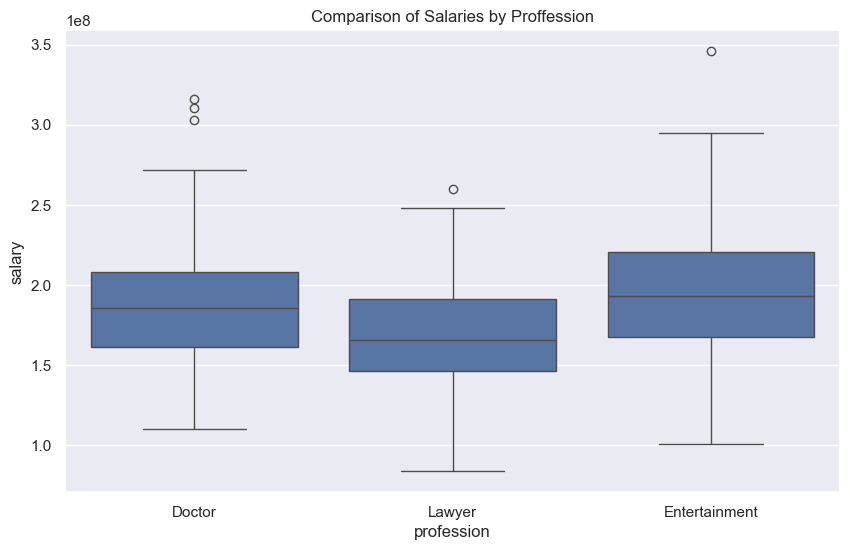

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='profession', y='salary', data=filtered_data_2)
plt.title('Comparison of Salaries by Proffession')
plt.show()

<div class="alert alert-warning">
    
Допустим вы рассматриваете 4 группы населения, отличающихся количеством  детей. Группы следующие.
* **A** - нет детей
* **B** - 1 ребенок
* **C** - от 2 до 4 детей
* **D** - от 5 детей    
    
    
* Правда ли, что эти группы отличаются статистически значимо по уровню дохода и уровню счастья? Ответ поддержите статистическими критериями и визуализацией

In [15]:
 # YOUR CODE

def categorize_children(row):
    if row['children'] == 0:
        return 'A'
    elif row['children'] == 1:
        return 'B'
    elif 2 <= row['children'] <= 4:
        return 'C'
    else:
        return 'D'
    
data['children_group'] = data.apply(categorize_children, axis=1)

In [18]:
for group in ['A', 'B', 'C', 'D']:
    salaries = data[data['children_group'] == group]['salary']
    happiness = data[data['children_group'] == group]['happyness']
    stat_salary, p_salary = shapiro(salaries)
    stat_happyness, p_happyness = shapiro(happiness)
    print(f'Group {group}: \n p-value for salary = {p_salary} \n p-value for happyness {p_happyness}')

Group A: 
 p-value for salary = 1.1354303123995365e-30 
 p-value for happyness 0.9720050124605942
Group B: 
 p-value for salary = 9.612447347007945e-29 
 p-value for happyness 0.13677318739067773
Group C: 
 p-value for salary = 2.995034114525086e-34 
 p-value for happyness 0.5123887867802444
Group D: 
 p-value for salary = 5.732565982394557e-12 
 p-value for happyness 0.8413535968207597


In [21]:
from scipy.stats import f_oneway

f_stat_salary, p_value_salary = f_oneway(
    data[data['children_group']== 'A']['salary'],
    data[data['children_group']== 'B']['salary'],
    data[data['children_group']== 'C']['salary'],
    data[data['children_group']== 'D']['salary'],
)


f_stat_salary, p_value_happyness = f_oneway(
    data[data['children_group']== 'A']['happyness'],
    data[data['children_group']== 'B']['happyness'],
    data[data['children_group']== 'C']['happyness'],
    data[data['children_group']== 'D']['happyness'],
)

print(f'ANOVA for salary: p-value = {p_value_salary}')
print(f'ANOVA for happyness: p-value = {p_value_happyness}')

ANOVA for salary: p-value = 6.772013575390892e-286
ANOVA for happyness: p-value = 4.728384961076856e-267


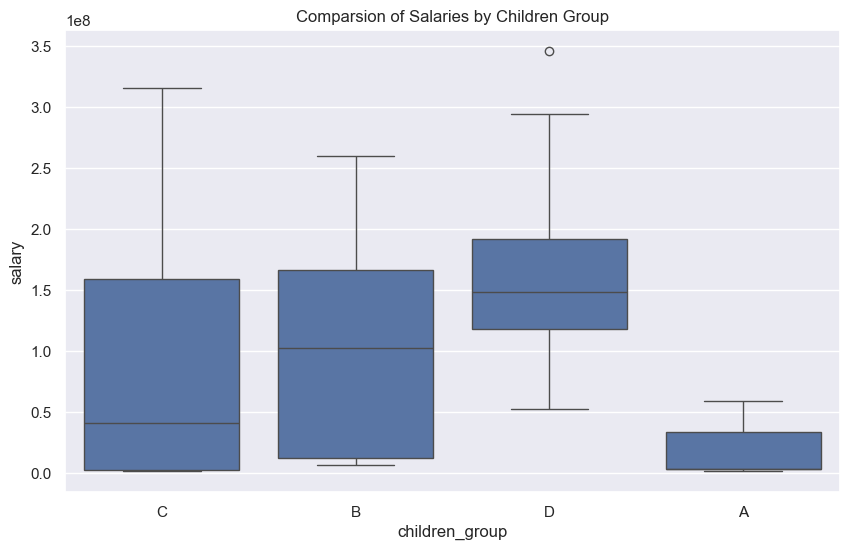

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='children_group', y='salary', data=data)
plt.title('Comparsion of Salaries by Children Group')
plt.show()

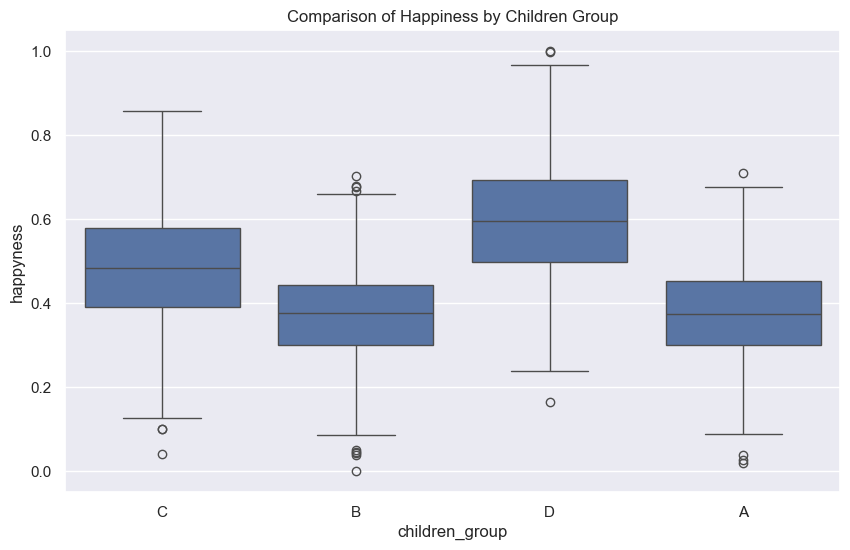

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children_group', y='happyness', data=data)
plt.title('Comparison of Happiness by Children Group')
plt.show()